# VecLib

A Python library for playing with and visualizing vectors in Jupyter notebooks. For personal learning purposes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

Roadmap

- <s>Addition and subtraction</s>
- <s>Scaling (multiplication)</s>
- Visualizing in 2D
- Visualizing in 3D
- Visualize dot products as projections
- Compute determinant
- Cross products

In [54]:
class Vector():
    """The base class for all vector operations"""
    
    def __init__(self, arr, base=np.array([1, 1])):
        self._arr = arr
        self.base = base
    
    def dot(self, other):
        return np.dot(self._arr, other._arr)

    def cross(self, other):
        pass
    
    def plot(self, ax=None):
        dims = len(self._arr)
        if dims > 3:
            raise Exception('Cannot plot over 3 dimensions')
        if not ax:
            fig, ax = plt.subplots()
        if dims == 1:
            self._plot1d(ax)
        elif dims == 2:
            self._plot2d(ax)
        elif dims == 3:
            self._plot3d(ax)
            
    def _plot2d(self, ax):
        x, y = self._arr
        ax.plot([0, x], [0, y])

    def __add__(self, other):
        return Vector(self._arr + other._arr)

    def __sub__(self, other):
        return Vector(self._arr - other._arr)

    def __mul__(self, scalar):
        return self._arr * scalar

In [55]:
v1 = Vector(np.array([1,2]))
v2 = Vector(np.array([5,3]))
v3 = Vector(np.array([5,3, 4, 4]))

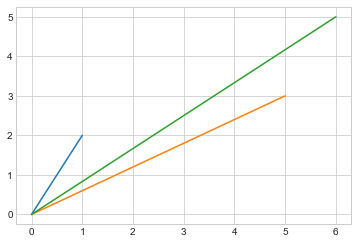

In [56]:
fig, ax = plt.subplots()
v1.plot(ax)
v2.plot(ax)
v3 = v1 + v2
v3.plot(ax)